In [14]:
import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

In [39]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import matplotlib
import matplotlib.pyplot as pyplot # for plotting


import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier,Pool
from IPython.display import display
import matplotlib.patches as patch
import matplotlib.pyplot as plt
from sklearn.svm import NuSVR
from scipy.stats import norm
from sklearn import svm
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import time
import glob
import sys
import os
import gc

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
test_results = pd.read_csv('sample_submission.csv')

In [10]:
data=train_df.append(test_df)
data.shape
data.head(2)

,ID_code,target,var_0,var_1,var_10,var_100,var_101,var_102,var_103,var_104,...,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99
0,train_0,0.0,8.9255,-6.7863,2.9252,9.4763,13.3102,26.5376,1.4403,14.7100,...,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132
1,train_1,0.0,11.5006,-4.1473,-0.4032,-13.6950,8.4068,35.4734,1.7093,15.1866,...,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939


In [4]:
train_df.shape, test_df.shape

((200000, 202), (200000, 201))

In [5]:
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    #return(np.transpose(tt))
    return tt

In [4]:
missing_data(train_df)

,Total,Percent,Types
ID_code,0,0.0,object
target,0,0.0,int64
var_0,0,0.0,float64
var_1,0,0.0,float64
var_2,0,0.0,float64
var_3,0,0.0,float64
var_4,0,0.0,float64
var_5,0,0.0,float64
var_6,0,0.0,float64
var_7,0,0.0,float64


In [28]:
%%time
missing_data(test_df)

Wall time: 2.13 s


,Total,Percent,Types
ID_code,0,0.0,object
var_0,0,0.0,float64
var_1,0,0.0,float64
var_2,0,0.0,float64
var_3,0,0.0,float64
var_4,0,0.0,float64
var_5,0,0.0,float64
var_6,0,0.0,float64
var_7,0,0.0,float64
var_8,0,0.0,float64


In [29]:
%%time
train_df.describe()

Wall time: 4.63 s


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [31]:
test_df.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


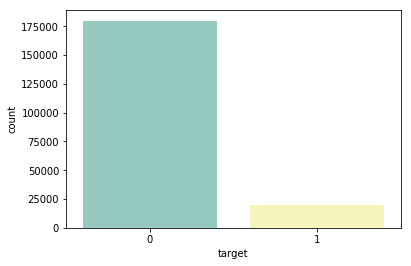

In [35]:
sns.countplot(train_df['target'], palette='Set3')

In [ ]:
# train_df['target'].value_counts()
def check_balance(df,target):
    check=[]
    # written by MJ Bahmani for binary target
    print('size of data is:',df.shape[0] )
    for i in [0,1]:
        print('for target  {} ='.format(i))
        print(df[target].value_counts()[i]/df.shape[0]*100,'%')
check_balance(train_df,'target')

# Check Feature Importance 

In [44]:
import eli5
from eli5.sklearn import PermutationImportance

#Create a sample model to calculate which feature are more important.
X,Y,X_train,X_test,y_train,y_test=splitData(data,features)
rfc_model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
perm = PermutationImportance(rfc_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(),top=150)

In [66]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist(),top=150)

Weight,Feature
0.0003 ± 0.0002,var_53
0.0002 ± 0.0002,var_110
0.0002 ± 0.0001,var_109
0.0002 ± 0.0002,var_139
0.0001 ± 0.0001,var_40
0.0001 ± 0.0001,var_115
0.0001 ± 0.0001,var_191
0.0001 ± 0.0001,var_123
0.0001 ± 0.0001,var_93
0.0001 ± 0.0001,var_9


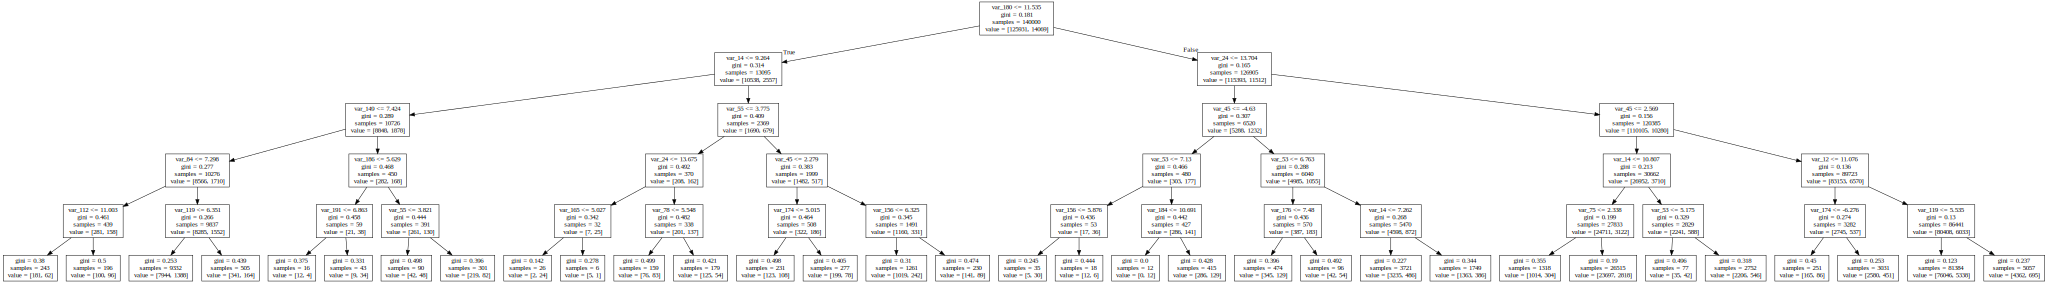

In [63]:
from sklearn import tree
import graphviz

tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=10).fit(X_train, y_train)
features = [c for c in train_df.columns if c not in ['ID_code', 'target']]
tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=features)
graphviz.Source(tree_graph)

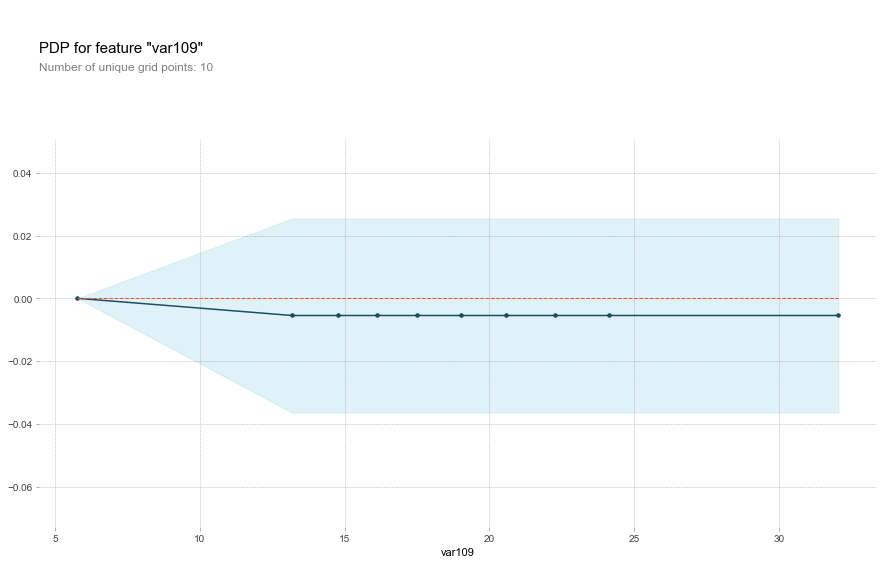

In [69]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Createe the data that we will plot
pdp_var109 = pdp.pdp_isolate(model=rfc_model, dataset=X_test, model_features=features, feature='var_109')

# plot it
pdp.pdp_plot(pdp_var109, 'var109')
plt.show()

# Impact of each variable to prediction for each example 

In [72]:
row_to_show = 100
data_for_prediction = X_test.iloc[row_to_show]  #Use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
rfc_model.predict_proba(data_for_prediction_array)

array([[ 1.,  0.]])

In [81]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rfc_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap_values
#shap.initjs()
#shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

C extension was not built during install!


ImportError: numpy.core.multiarray failed to import

In [75]:
a=X_test.iloc[5]
b=a.values.reshape(1,-1)



array([[  5.4052,  -4.9218,   4.7669,   2.4121,   8.1439,  27.9099,
          1.6161,  10.4368,   4.346 ,   7.7561,  31.8493,  14.2638,
         22.8178,  -8.1983,   6.058 ,   4.4472,   3.9303,   3.5858,
          4.3564,   5.3718,   4.7311,   2.8716, -14.6162,   2.7258,
         13.747 ,  25.8824,  12.7679,  -0.9279,  15.0002,   2.1791,
         12.8684,  13.0807,  -0.4872,   0.5208,  15.9671,   6.9334,
         12.0666,   0.2692,  10.7936,   7.2657,  -4.6411,   8.4019,
         21.7464,  20.395 ,   2.1252,   9.9897,   5.5238,   4.0465,
          3.5159,  16.5916,  15.6584,   8.1986,  -1.3055,   8.6818,
          0.9522,   3.8088,   1.6301,  13.8503,  17.8803,   9.7522,
          3.2034,  16.3813,   4.9337,  -0.6002,  12.8891,  -5.1222,
         27.6102,   7.8142,  11.7199,  27.1949,   5.79  ,   7.0153,
         11.7348,   9.033 ,  15.5113,   3.3152,   0.8622,   6.1823,
          5.4441,   2.3525,   3.8131,   0.874 ,  16.0704,  -5.2029,
         11.2826,  12.1991,   1.7174,  12.5388, 

In [ ]:
Features to consider when do feature engineering 

Simple Feature Engineering and Pre-processing
sum
min
max
mean
std
skew
kurt
med
Moving Average
percentiles
Augmentation
Log transformation
normalization

In [55]:
#Differnet fetures according to the target variable with 
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();
    

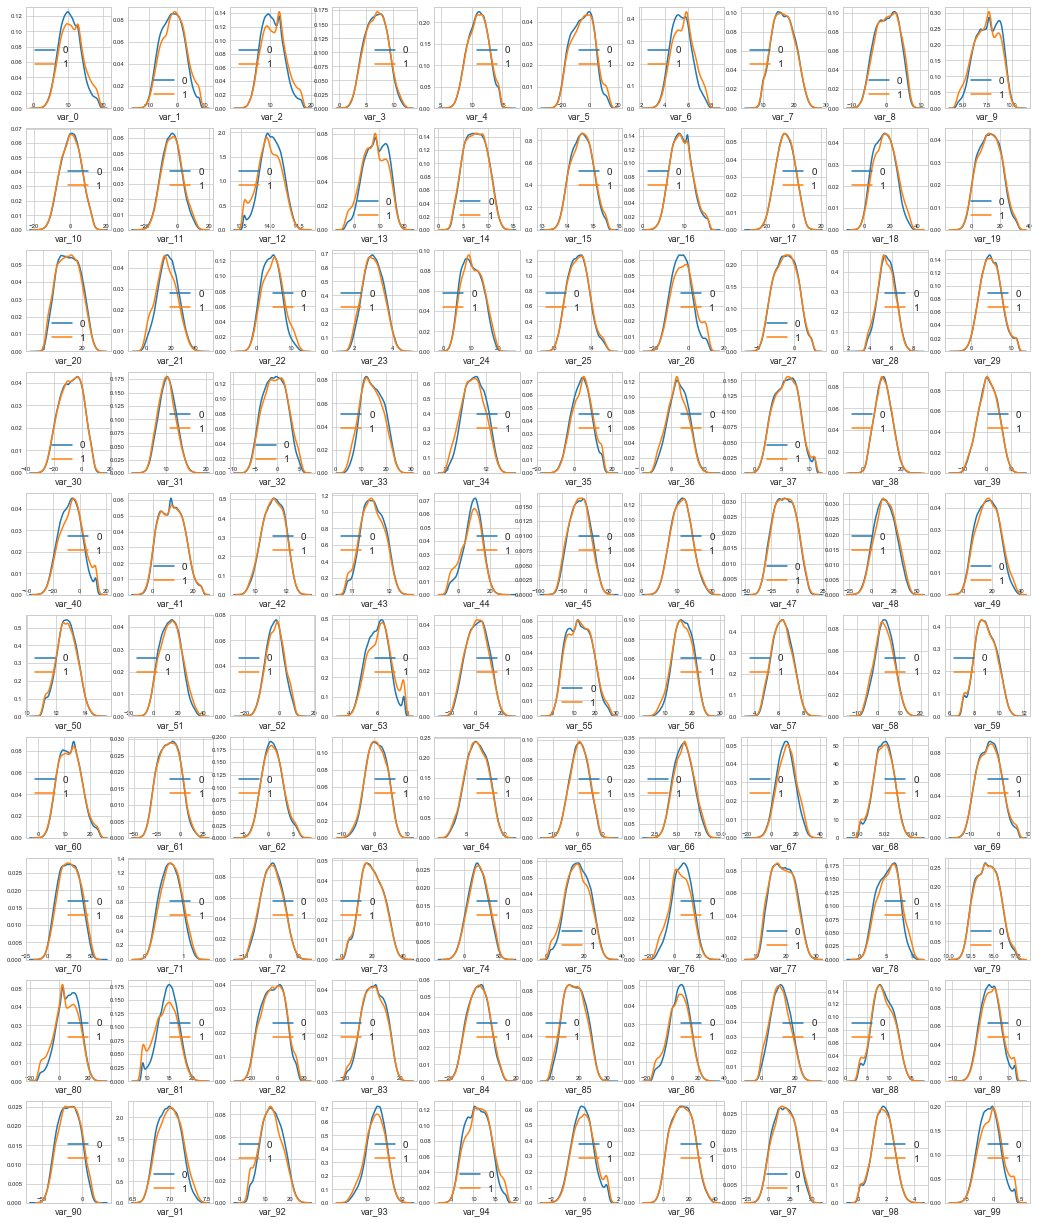

In [36]:
#First 100 featurs 
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
features = train_df.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

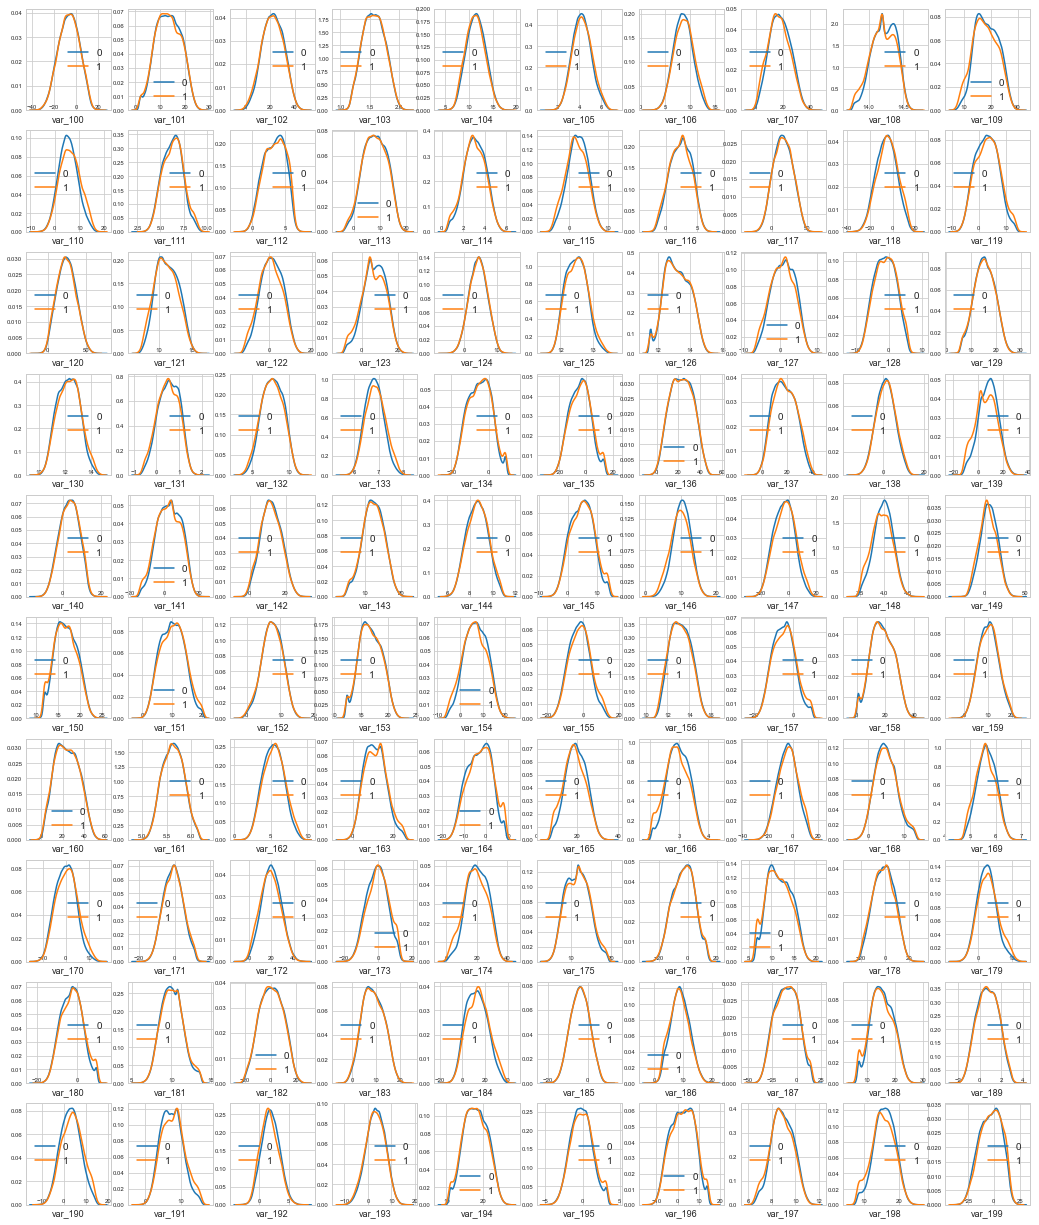

In [37]:
#Last 100 features 
features = train_df.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

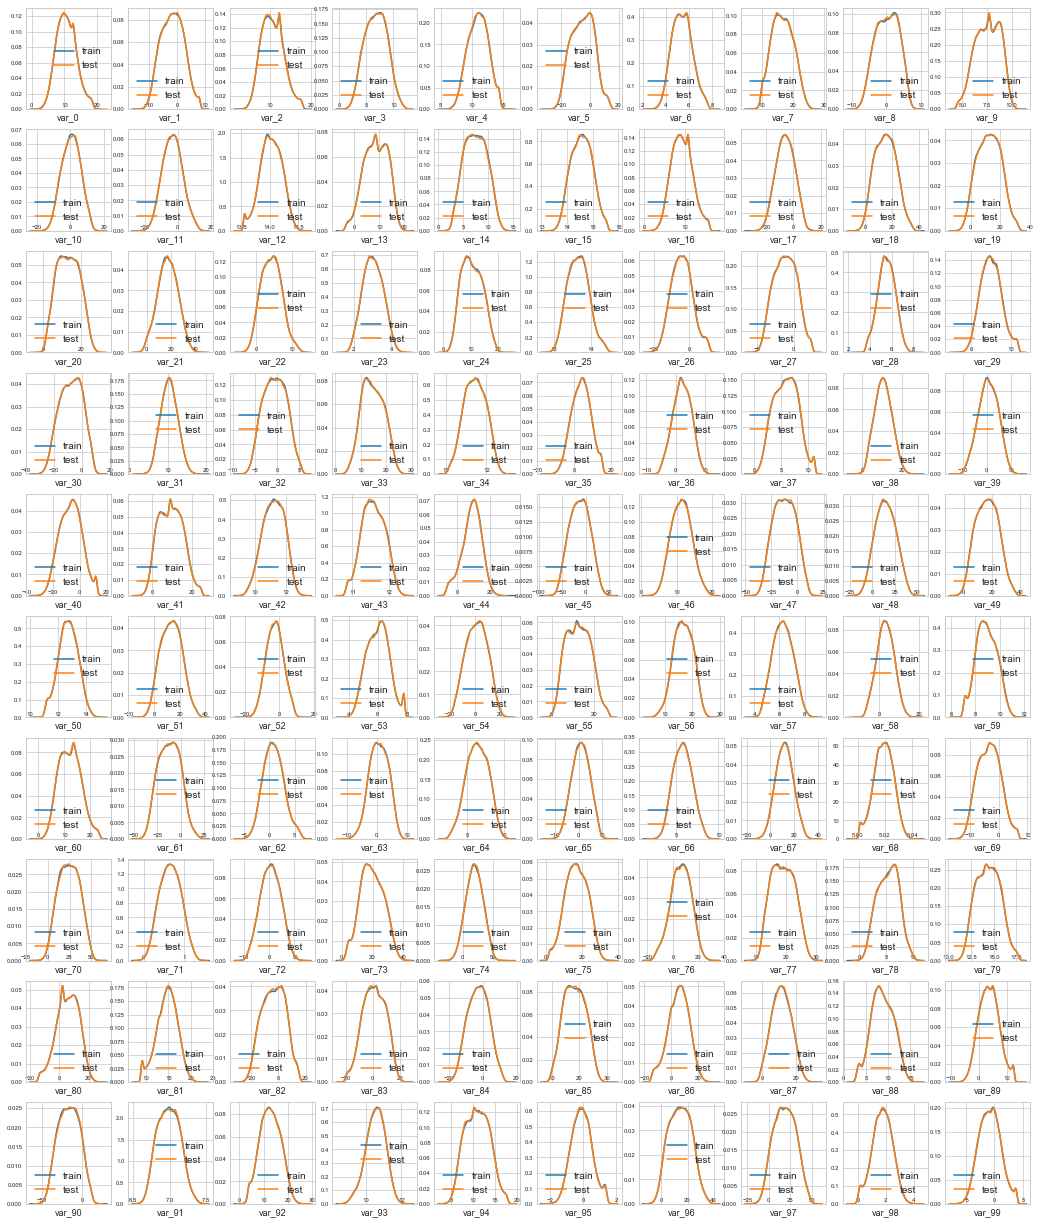

In [39]:
#Firat 100 features for train and test 
features = train_df.columns.values[2:102]
plot_feature_distribution(train_df, test_df, 'train', 'test', features)

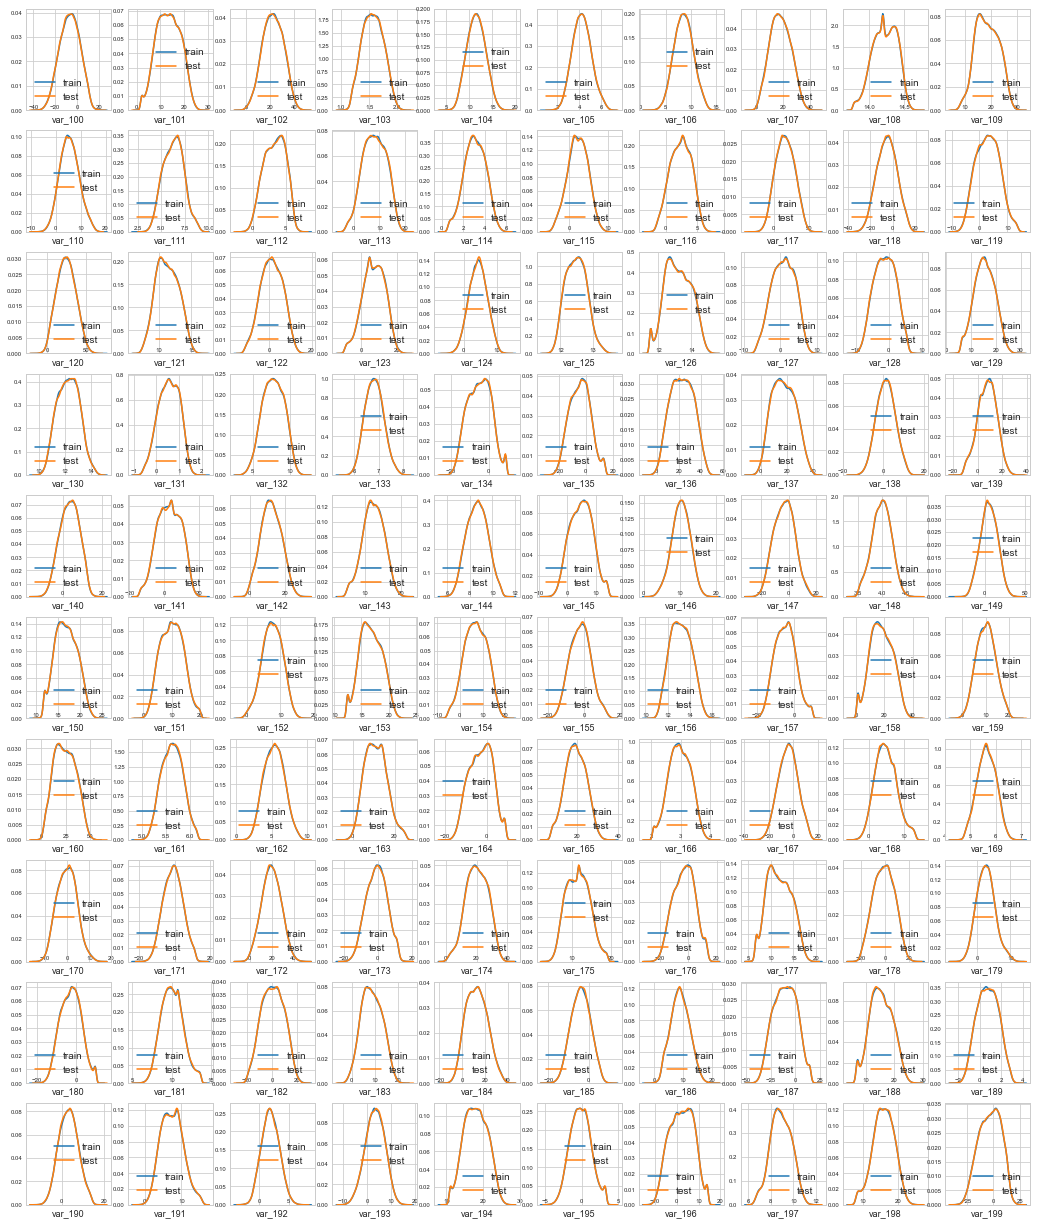

In [40]:
#Last 100 features for train and test 
features = train_df.columns.values[102:202]
plot_feature_distribution(train_df, test_df, 'train', 'test', features)

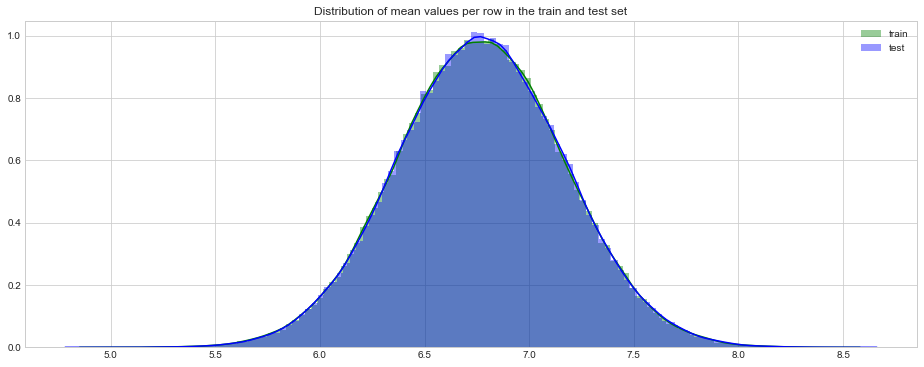

In [41]:
#distribution of the mean values per row in the train and test set.
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train_df[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

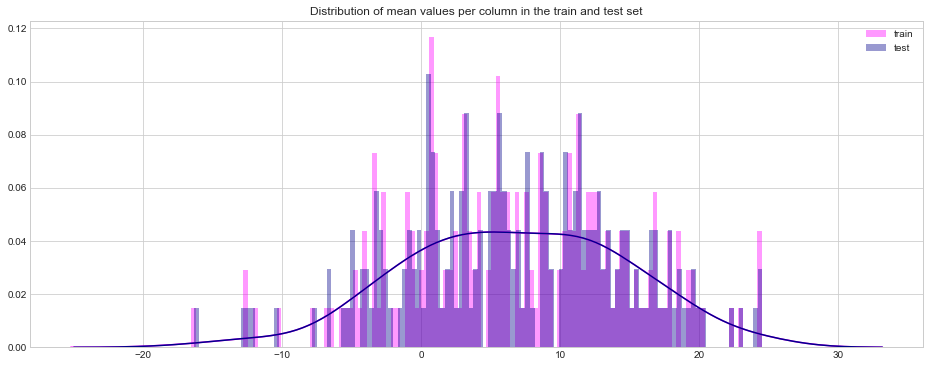

In [42]:
#distribution of the mean values per columns in the train and test set.
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train_df[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

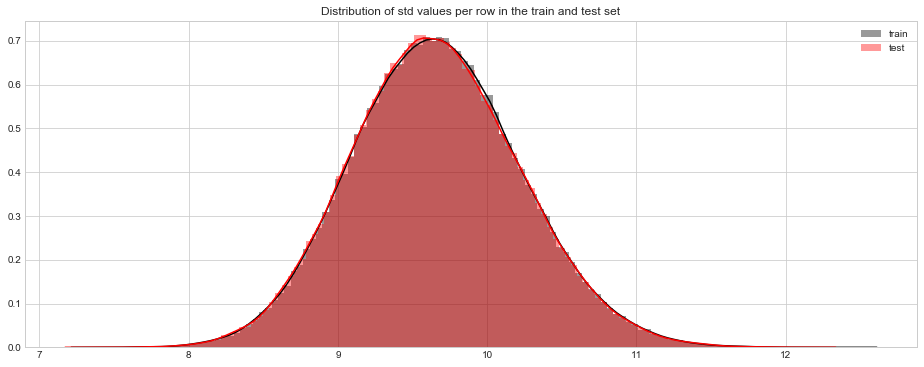

In [43]:
# distribution of standard deviation of values per row for train and test datasets.
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train_df[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend();plt.show()

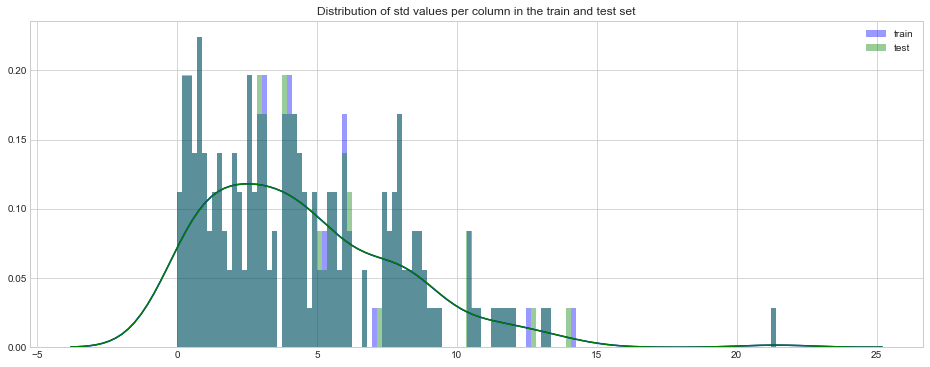

In [44]:
#distribution of the standard deviation of values per columns in the train and test datasets.
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(train_df[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend(); plt.show()

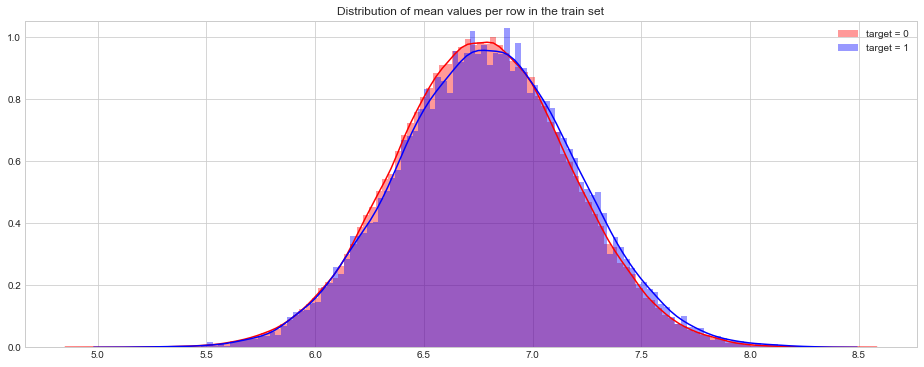

In [45]:
#distribution of the mean value per row in the train dataset, grouped by value of target.
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train set")
sns.distplot(t0[features].mean(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

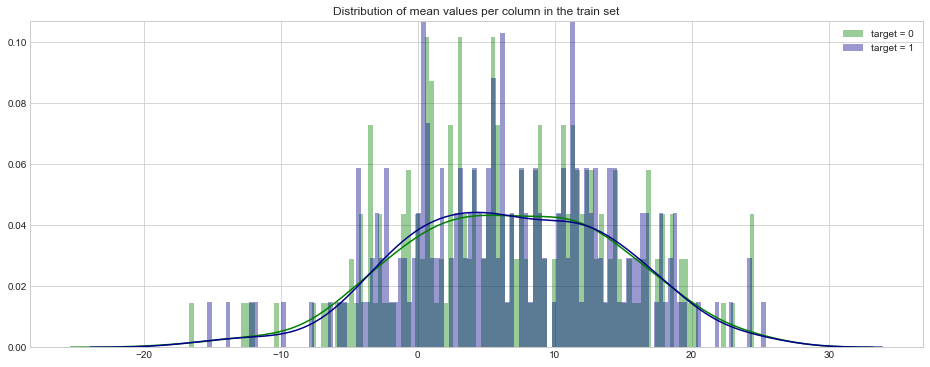

In [46]:
#distribution of the mean value per column in the train dataset, grouped by value of target.
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train set")
sns.distplot(t0[features].mean(axis=0),color="green", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

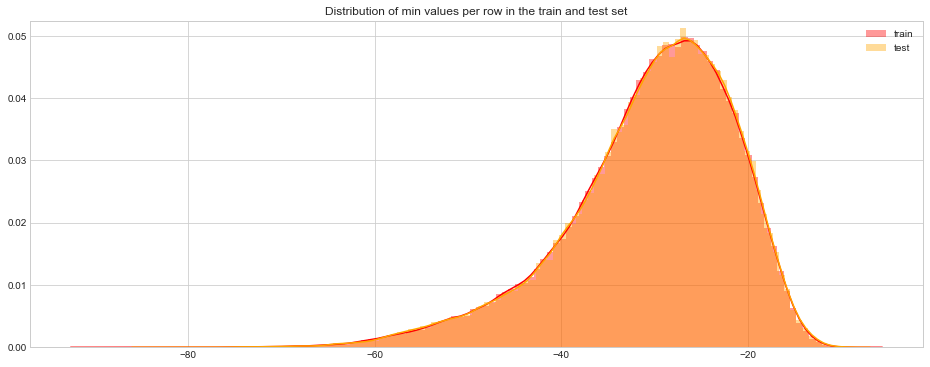

In [47]:
#distribution of min per row in the train and test set.
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of min values per row in the train and test set")
sns.distplot(train_df[features].min(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(test_df[features].min(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

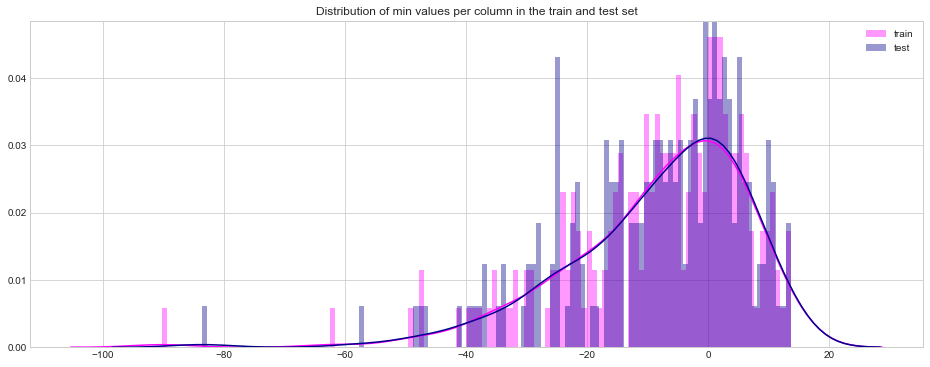

In [48]:
#distribution of min per column in the train and test set.
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of min values per column in the train and test set")
sns.distplot(train_df[features].min(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test_df[features].min(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

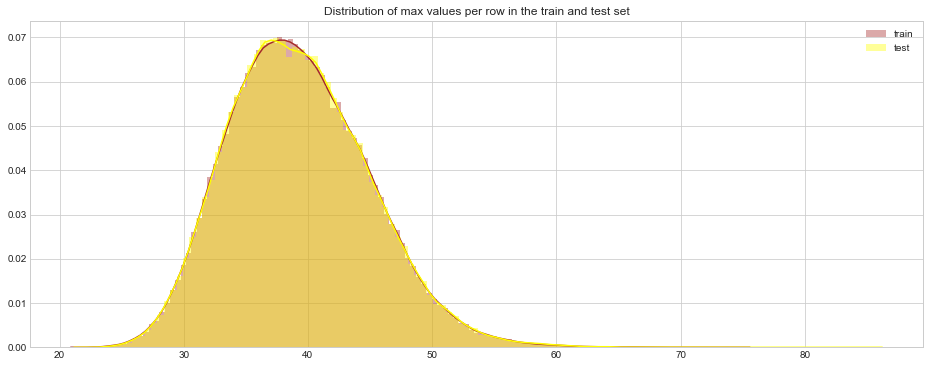

In [49]:
#distribution of max values per rows for train and test set.
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of max values per row in the train and test set")
sns.distplot(train_df[features].max(axis=1),color="brown", kde=True,bins=120, label='train')
sns.distplot(test_df[features].max(axis=1),color="yellow", kde=True,bins=120, label='test')
plt.legend()
plt.show()

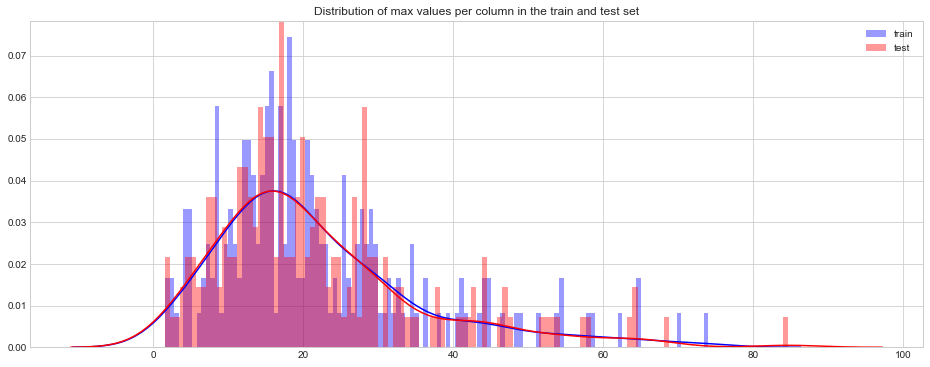

In [50]:
#max distribution on columns for train and test set.
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of max values per column in the train and test set")
sns.distplot(train_df[features].max(axis=0),color="blue", kde=True,bins=120, label='train')
sns.distplot(test_df[features].max(axis=0),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()


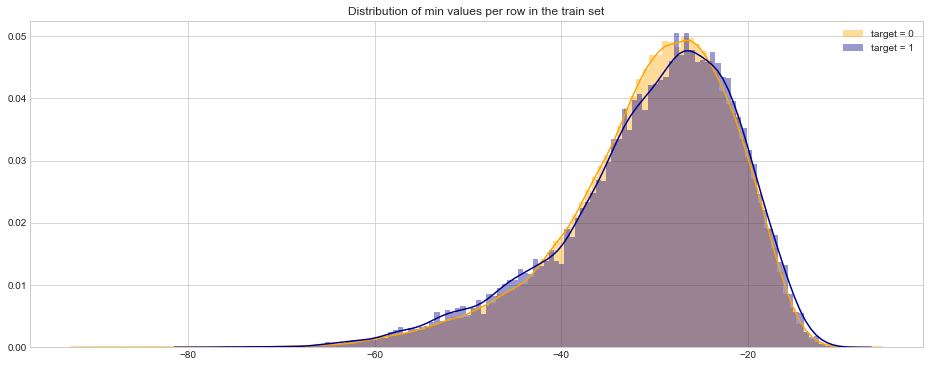

In [51]:
# distributions of min values per row in train set, separated on the values of target (0 and 1).
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per row in the train set")
sns.distplot(t0[features].min(axis=1),color="orange", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].min(axis=1),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

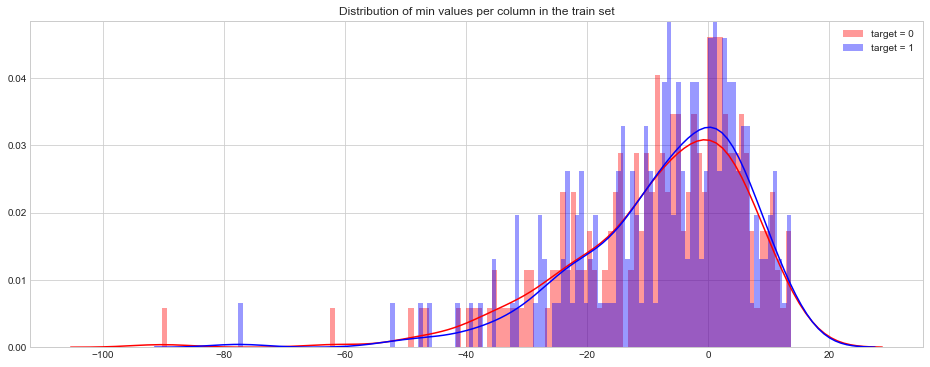

In [52]:
# distributions of min values per columns in train set, separated on the values of target (0 and 1).
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per column in the train set")
sns.distplot(t0[features].min(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].min(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()


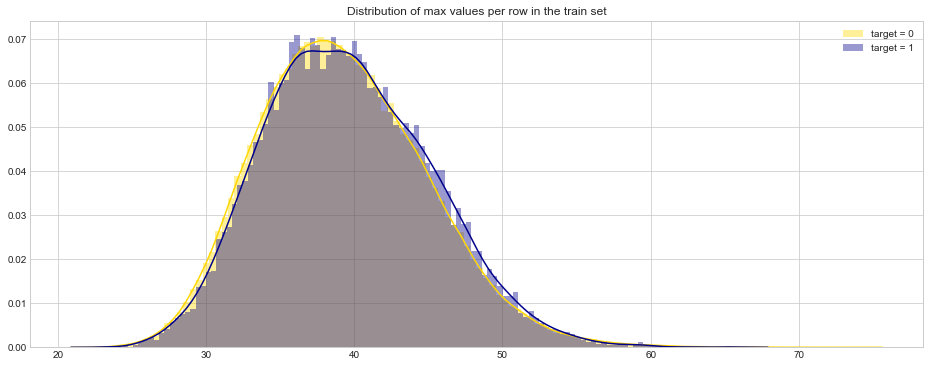

In [53]:
#distribution of max values per rown in the train set.
plt.figure(figsize=(16,6))
plt.title("Distribution of max values per row in the train set")
sns.distplot(t0[features].max(axis=1),color="gold", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].max(axis=1),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

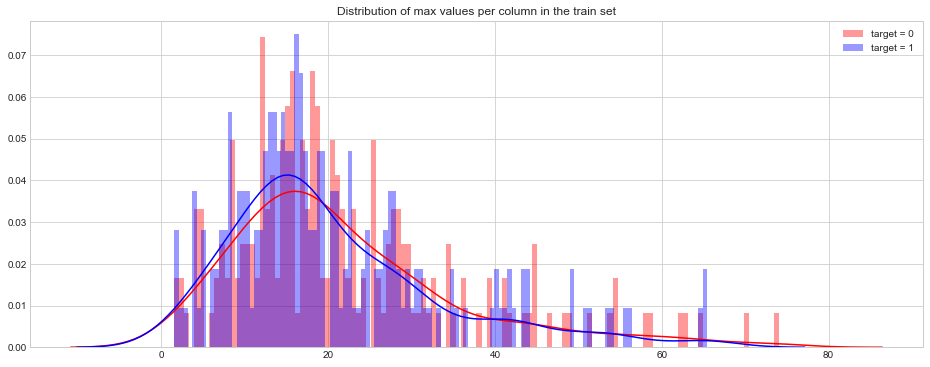

In [54]:
##distribution of max values per columns in the train set.
plt.figure(figsize=(16,6))
plt.title("Distribution of max values per column in the train set")
sns.distplot(t0[features].max(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].max(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

In [58]:
%%time
correlations = train_df[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

,level_0,level_1,0
0,var_75,var_191,2.703975e-08
1,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
5,var_109,var_126,1.313947e-07
6,var_144,var_27,1.772502e-07
7,var_27,var_144,1.772502e-07
8,var_177,var_100,3.116544e-07
9,var_100,var_177,3.116544e-07


# Feature Engineering 

Features to consider when do feature engineering 

Simple Feature Engineering and Pre-processing
sum
min
max
mean
std
skew
kurt
med
Moving Average
percentiles
Augmentation
Log transformation
normalization

In [60]:
%%time

#Feature engineering 
idx = features = train_df.columns.values[2:202]
for df in [test_df, train_df]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

Wall time: 24.7 s


In [65]:
def plot_new_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(8,1,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();
    

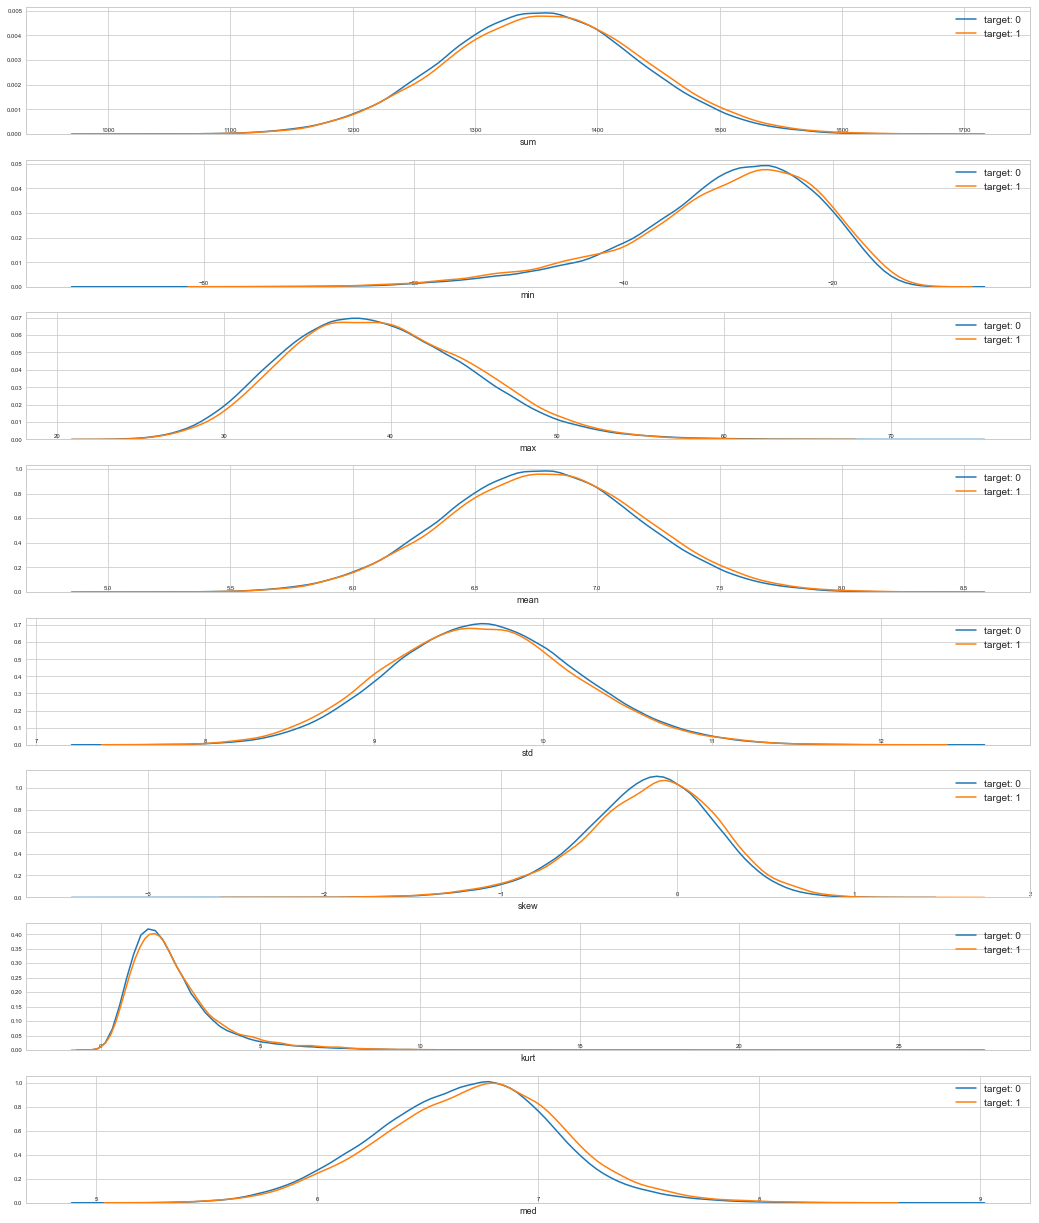

In [66]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
features = train_df.columns.values[202:]
plot_new_feature_distribution(t0, t1, 'target: 0', 'target: 1', features)

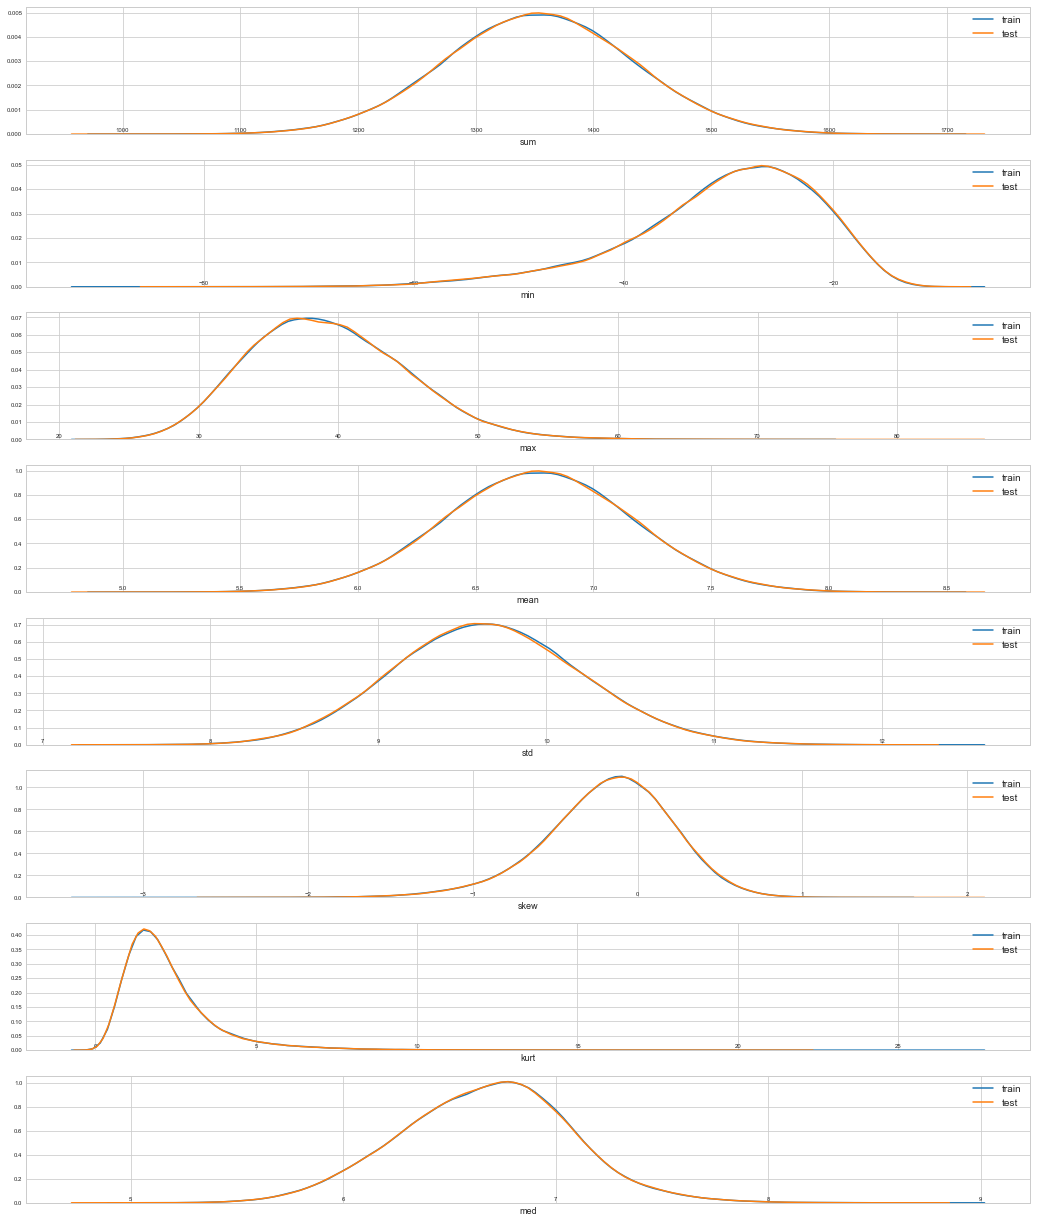

In [67]:
features = train_df.columns.values[202:]
plot_new_feature_distribution(train_df, test_df, 'train', 'test', features)

# Model -LGB

In [90]:
def initModelPara(data,target,IDcol):
    target = target
    IDcol = IDcol
    predictors = [x for x in data.columns if x not in [IDcol]]
    features = [x for x in data.columns if x not in [IDcol,target]]

    alg = lgb.LGBMClassifier(
     learning_rate =0.1,
     n_estimators=1000,
     max_depth=7,
     min_child_weight=1,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary',
     nthread=4,
     metric='auc',
     seed=27,
     max_bin=100)
    return alg,predictors,features

def splitData(data,features):
    X = data.loc[~data.target.isna(),features]
    Y = data[~data.target.isna()].target
    X_train, X_test, y_train, y_test = train_test_split( X, Y,test_size = 0.3, random_state = 100,stratify=Y)
    return X,Y,X_train,X_test,y_train,y_test

def prediction(alg,data):
    predictions = alg.predict(data)
    predprob = alg.predict_proba(data)[:,1]
    return predictions,predprob

def modelReport(data,predictions,predprob):
     
    print("Accuracy : %.4g" % metrics.accuracy_score(data, predictions))
    print("AUC Score (Test): %f" % metrics.roc_auc_score(data, predprob))
    
def modelFit(alg,X,Y):
    #Fit the algorithm on the data
    alg.fit(X, Y,eval_metric='auc')
    return alg

def modelPlots(cvresult,evals_results,model):
    # plot AUC from cvresult (lgb.cv)
    x_axis = range(0, len(cvresult['auc-mean']))
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, cvresult['auc-mean'], label='Test')
    #ax.plot(x_axis, cvresult['test-auc-mean'], label='Test')
    ax.legend()
    pyplot.show()
    
    # plot AUC from train (lgb.train)
    x_axis = range(0, len(evals_results['train']['auc']))
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, evals_results['train']['auc'], label='Train')
    ax.plot(x_axis, evals_results['valid']['auc'], label='Test')
    ax.legend()
    pyplot.show()    
    
    # Plot importance
    lgb.plot_importance(model,importance_type="split", title="split",max_num_features=10,height=0.5)
    plt.show()
    lgb.plot_importance(model, importance_type="gain", title='gain',max_num_features=10,height=0.5)
    plt.show()

    #ROC c 
    #tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
    
#Testing using 2 methods namely lgb.cv method and lgb.train method 
def modelTest(alg,X_train,y_train,X_test,y_test,metric,early_stopping_rounds):
    lgb_params = alg.get_params()
    lgb_train = lgb.Dataset(data=X_train, label=y_train)
    lgb_eval = lgb.Dataset(data=X_test, label=y_test)
    cvresult = lgb.cv(lgb_params,lgb_train, nfold = 3, metrics = metric, early_stopping_rounds =early_stopping_rounds,
                      seed = 100,verbose_eval=10)
    alg.set_params(n_estimators=len(cvresult['auc-mean']))
    
    lgb_params=alg.get_params()
    evals_results = {}
    model = lgb.train(lgb_params,lgb_train,valid_sets=[lgb_train,lgb_eval],verbose_eval=10,valid_names=['train','valid']
                      ,evals_result=evals_results)
    algo=modelFit(alg,X_train,y_train)
    
    print("\nModel Report-Train")
    predictionTr,predprobTr=prediction(algo,X_train)
    modelReport(y_train,predictionTr,predprobTr)
    
    print("\nModel Report-Test")
    predictionTe,predprobTe=prediction(algo,X_test)
    modelReport(y_test,predictionTe,predprobTe)
    
    modelPlots(cvresult,evals_results,model)
    return alg
     
def modelPredict(data,alg,X,Y,IDcol,target):
    alg=modelFit(alg,X,Y)
    #Predicting for the test set 
    feat1= [x for x in data.columns if x not in [target]] 
    testD=data.loc[data.target.isna(),feat1]
    feat2= [x for x in testD.columns if x not in [IDcol]]
    testD['target'] = alg.predict_proba(testD[feat2])[:,1]
    testD=testD[[IDcol,'target']]
    testD.to_csv("PredictionStan.csv",index=False) 

[10]	cv_agg's auc: 0.735982 + 0.00613519
[20]	cv_agg's auc: 0.765956 + 0.0061896
[30]	cv_agg's auc: 0.79181 + 0.00316168
[40]	cv_agg's auc: 0.811931 + 0.00314817
[50]	cv_agg's auc: 0.824411 + 0.0030391
[60]	cv_agg's auc: 0.834361 + 0.00233349
[70]	cv_agg's auc: 0.842389 + 0.0013797
[80]	cv_agg's auc: 0.849064 + 0.00102506
[90]	cv_agg's auc: 0.854264 + 0.000648911
[100]	cv_agg's auc: 0.858338 + 0.000584771
[110]	cv_agg's auc: 0.861313 + 0.000219919
[120]	cv_agg's auc: 0.864267 + 0.000321633
[130]	cv_agg's auc: 0.867181 + 0.000345312
[140]	cv_agg's auc: 0.869554 + 0.000150137
[150]	cv_agg's auc: 0.871326 + 0.000152968
[160]	cv_agg's auc: 0.873268 + 0.000396271
[170]	cv_agg's auc: 0.874549 + 0.000434034
[180]	cv_agg's auc: 0.87568 + 0.000681129
[190]	cv_agg's auc: 0.876746 + 0.000674265
[200]	cv_agg's auc: 0.877585 + 0.000479572
[210]	cv_agg's auc: 0.878439 + 0.000517033
[220]	cv_agg's auc: 0.87904 + 0.000609471
[230]	cv_agg's auc: 0.879607 + 0.000700396
[240]	cv_agg's auc: 0.880068 + 0.0

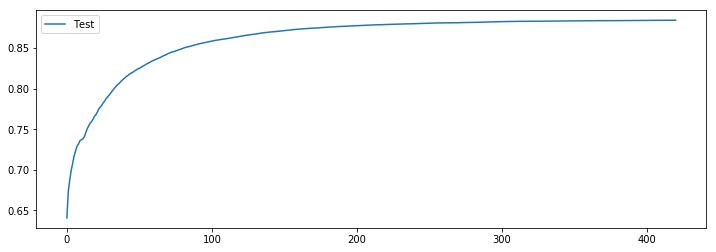

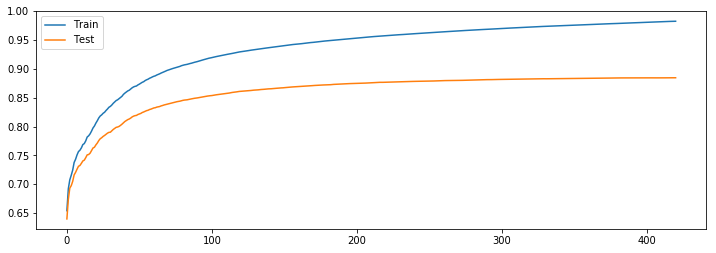

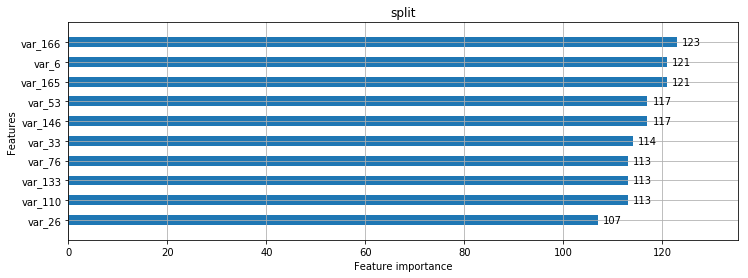

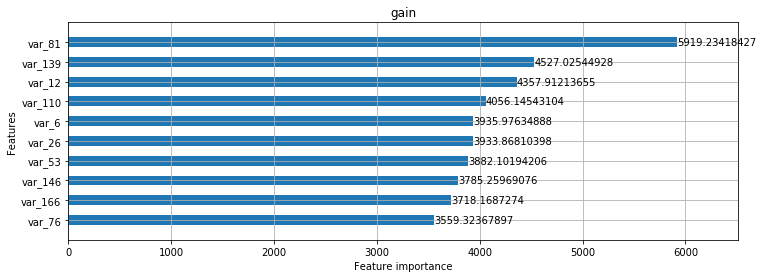

In [91]:
#Choose all predictors except target & IDcols
alg,predictors,features=initModelPara(data,'target','ID_code')
X,Y,X_train,X_test,y_train,y_test=splitData(data,features)
alg =modelTest(alg,X_train,y_train,X_test,y_test,'auc',50)
#modelPredict(data,alg,X,Y,features)

In [34]:
modelPredict(data,alg,X,Y,'ID_code','target')

In [89]:
alg=modelFit(alg,X_train,y_train)
perm = PermutationImportance(alg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(),top=150)

KeyboardInterrupt: 

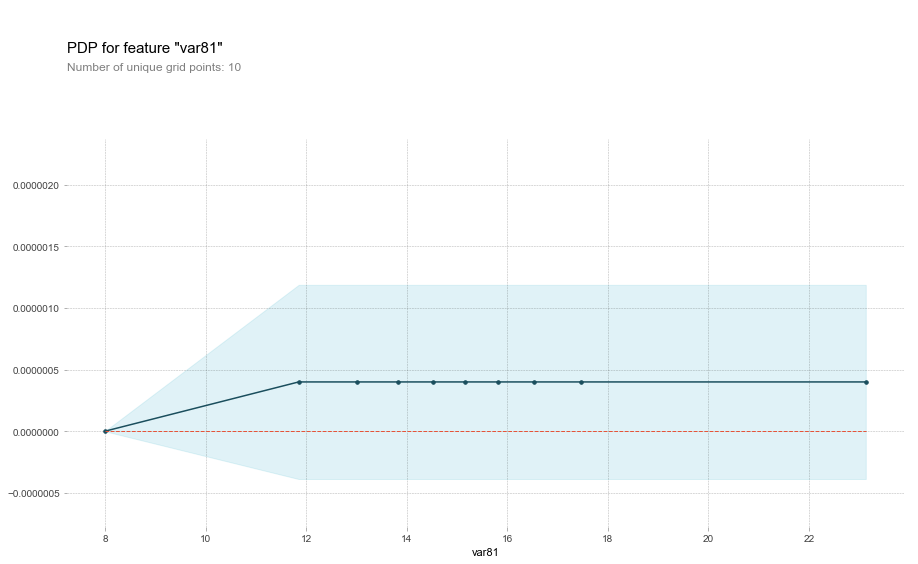

In [85]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Createe the data that we will plot
pdp_var81 = pdp.pdp_isolate(model=alg, dataset=X_test, model_features=features, feature='var_81')

# plot it
pdp.pdp_plot(pdp_var81, 'var81')
plt.show()

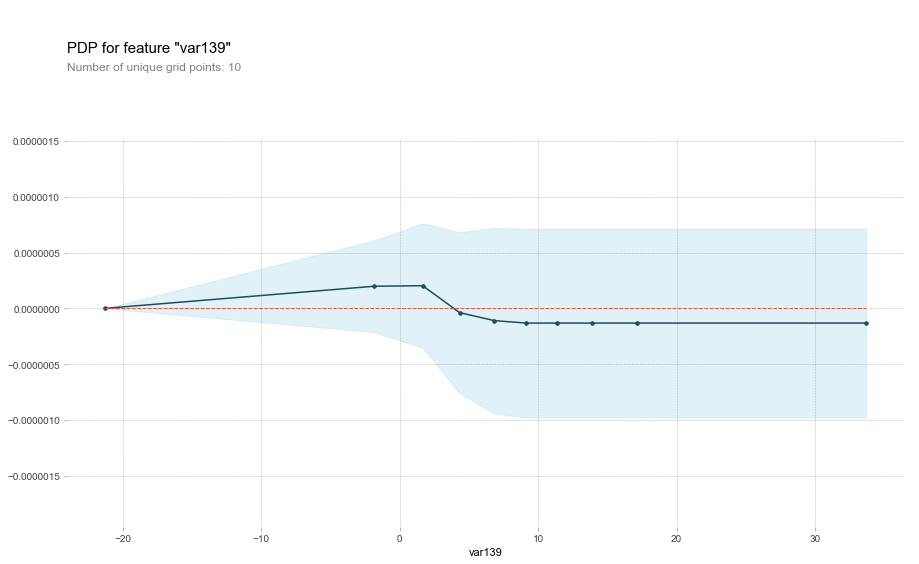

In [86]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Createe the data that we will plot
pdp_var139 = pdp.pdp_isolate(model=alg, dataset=X_test, model_features=features, feature='var_139')

# plot it
pdp.pdp_plot(pdp_var139, 'var139')
plt.show()

In [87]:
row_to_show = 100
data_for_prediction = X_test.iloc[row_to_show]  #Use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
alg.predict_proba(data_for_prediction_array)

array([[ 0.92677713,  0.07322287]])

# Neural Network with Keras

In [ ]:
#Neural Network 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout, BatchNormalization
from sklearn.model_selection import KFold,StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import  train_test_split
from keras import backend as K
from keras import optimizers
import keras as k
import time
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

sampledf = False  #Uses a specific amount of rows , use this for faster training and testing functionalities and features
frac_sample = 0.01 #fraction of the data to use
augmnt = False #use an augmented data set
fold_train = True
agmnt_between = True #augment training data between folds
kfold_shuffle = False
use_perc = False #using percentiles in feature engineering
log_transf = False
sq_data = True
dim_red = False
n_components = 60
standradize=False
train_between = True
freq = True
feature_eng_cv = True #to prevent leakage we apply feature engineering inside the K-fold cv for each split independently
#Keras options
#Weighted Classes when training 
weighted = False
balanced = False #balanced weights
#-------------------
#train test Split
tst_size = 0.3

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

#Model NN definition
def create_model_nn(in_dim,layer_size=200):
    model = Sequential()
    model.add(Dense(layer_size,input_dim=in_dim, kernel_initializer='normal'))
    if not standradize:
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    for i in range(2):
        model.add(Dense(layer_size))
        if not standradize:
            model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    adam = optimizers.Adam(lr=0.001)
    model.compile(optimizer=adam,loss='binary_crossentropy',metrics = [auc])    
    return model

#Class weights to handle the unbalanced dataset
class_weights = None
if weighted:
    sub_name = sub_name+'_weighted'
    if balanced:
        class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
    else:
        class_weights = {
            1:50, 
            0:1
                }

        model_nn = create_model_nn(X_train.shape[1])
callback = EarlyStopping(monitor="val_auc", patience=50, verbose=0, mode='max')
history = model_nn.fit(X_train, y_train, validation_data = (X_test ,y_test),epochs=50,batch_size=64,verbose=1,callbacks=[callback],class_weight=class_weights)
testD=data.loc[data.target.isna(),feat1]
#target_pred_nn = model_nn.predict(testD)[:,0]
print('\n Validation Max score : {}'.format(np.max(history.history['val_auc'])))

# Boosting algorithms as functions 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
import pickle
import os
import gc
gc.enable()


def fit_lgb(X_fit, y_fit, X_val, y_val, counter, lgb_path, name):
    
    model = lgb.LGBMClassifier(max_depth=-1,
                               n_estimators=999999,
                               learning_rate=0.02,
                               colsample_bytree=0.3,
                               num_leaves=2,
                               metric='auc',
                               objective='binary', 
                               n_jobs=-1)
     
    model.fit(X_fit, y_fit, 
              eval_set=[(X_val, y_val)],
              verbose=0, 
              early_stopping_rounds=1000)
                  
    cv_val = model.predict_proba(X_val)[:,1]
    
    #Save LightGBM Model
    save_to = '{}{}_fold{}.txt'.format(lgb_path, name, counter+1)
    model.booster_.save_model(save_to)
    
    return cv_val
    
    
def fit_xgb(X_fit, y_fit, X_val, y_val, counter, xgb_path, name):
    
    model = xgb.XGBClassifier(max_depth=2,
                              n_estimators=999999,
                              colsample_bytree=0.3,
                              learning_rate=0.02,
                              objective='binary:logistic', 
                              n_jobs=-1)
     
    model.fit(X_fit, y_fit, 
              eval_set=[(X_val, y_val)], 
              verbose=0, 
              early_stopping_rounds=1000)
              
    cv_val = model.predict_proba(X_val)[:,1]
    
    #Save XGBoost Model
    save_to = '{}{}_fold{}.dat'.format(xgb_path, name, counter+1)
    pickle.dump(model, open(save_to, "wb"))
    
    return cv_val
    
    
def fit_cb(X_fit, y_fit, X_val, y_val, counter, cb_path, name):
    
    model = cb.CatBoostClassifier(iterations=999999,
                                  max_depth=2,
                                  learning_rate=0.02,
                                  colsample_bylevel=0.03,
                                  objective="Logloss")
                                  
    model.fit(X_fit, y_fit, 
              eval_set=[(X_val, y_val)], 
              verbose=0, early_stopping_rounds=1000)
              
    cv_val = model.predict_proba(X_val)[:,1]
    
    #Save Catboost Model          
    save_to = "{}{}_fold{}.mlmodel".format(cb_path, name, counter+1)
    model.save_model(save_to, format="coreml", 
                     export_parameters={'prediction_type': 'probability'})
                     
    return cv_val


def train_stage(df_path, lgb_path, xgb_path, cb_path):
    
    print('Load Train Data.')
    df = pd.read_csv(df_path)
    print('\nShape of Train Data: {}'.format(df.shape))
    
    y_df = np.array(df['target'])                        
    df_ids = np.array(df.index)                     
    df.drop(['ID_code', 'target'], axis=1, inplace=True)
    
    lgb_cv_result = np.zeros(df.shape[0])
    xgb_cv_result = np.zeros(df.shape[0])
    cb_cv_result  = np.zeros(df.shape[0])
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    skf.get_n_splits(df_ids, y_df)
    
    print('\nModel Fitting...')
    for counter, ids in enumerate(skf.split(df_ids, y_df)):
        print('\nFold {}'.format(counter+1))
        X_fit, y_fit = df.values[ids[0]], y_df[ids[0]]
        X_val, y_val = df.values[ids[1]], y_df[ids[1]]
    
        print('LigthGBM')
        lgb_cv_result[ids[1]] += fit_lgb(X_fit, y_fit, X_val, y_val, counter, lgb_path, name='lgb')
        print('XGBoost')
        xgb_cv_result[ids[1]] += fit_xgb(X_fit, y_fit, X_val, y_val, counter, xgb_path, name='xgb')
        print('CatBoost')
        cb_cv_result[ids[1]]  += fit_cb(X_fit,  y_fit, X_val, y_val, counter, cb_path,  name='cb')
        
        del X_fit, X_val, y_fit, y_val
        gc.collect()
    
    auc_lgb  = round(roc_auc_score(y_df, lgb_cv_result),4)
    auc_xgb  = round(roc_auc_score(y_df, xgb_cv_result),4)
    auc_cb   = round(roc_auc_score(y_df, cb_cv_result), 4)
    auc_mean = round(roc_auc_score(y_df, (lgb_cv_result+xgb_cv_result+cb_cv_result)/3), 4)
    auc_mean_lgb_cb = round(roc_auc_score(y_df, (lgb_cv_result+cb_cv_result)/2), 4)
    print('\nLightGBM VAL AUC: {}'.format(auc_lgb))
    print('XGBoost  VAL AUC: {}'.format(auc_xgb))
    print('Catboost VAL AUC: {}'.format(auc_cb))
    print('Mean Catboost+LightGBM VAL AUC: {}'.format(auc_mean_lgb_cb))
    print('Mean XGBoost+Catboost+LightGBM, VAL AUC: {}\n'.format(auc_mean))
    
    return 0
    
    
def prediction_stage(df_path, lgb_path, xgb_path, cb_path):
    
    print('Load Test Data.')
    df = pd.read_csv(df_path)
    print('\nShape of Test Data: {}'.format(df.shape))
    
    df.drop(['ID_code'], axis=1, inplace=True)
    
    lgb_models = sorted(os.listdir(lgb_path))
    xgb_models = sorted(os.listdir(xgb_path))
    cb_models  = sorted(os.listdir(cb_path))
    
    lgb_result = np.zeros(df.shape[0])
    xgb_result = np.zeros(df.shape[0])
    cb_result  = np.zeros(df.shape[0])
    
    print('\nMake predictions...\n')
    
    print('With LightGBM...')
    for m_name in lgb_models:
        #Load LightGBM Model
        model = lgb.Booster(model_file='{}{}'.format(lgb_path, m_name))
        lgb_result += model.predict(df.values)
     
    print('With XGBoost...')    
    for m_name in xgb_models:
        #Load Catboost Model
        model = pickle.load(open('{}{}'.format(xgb_path, m_name), "rb"))
        xgb_result += model.predict_proba(df.values)[:,1]
    
    print('With CatBoost...')        
    for m_name in cb_models:
        #Load Catboost Model
        model = cb.CatBoostClassifier()
        model = model.load_model('{}{}'.format(cb_path, m_name), format = 'coreml')
        cb_result += model.predict(df.values, prediction_type='Probability')[:,1]
    
    lgb_result /= len(lgb_models)
    xgb_result /= len(xgb_models)
    cb_result  /= len(cb_models)
    
    submission = pd.read_csv('../input/sample_submission.csv')
    submission['target'] = (lgb_result+xgb_result+cb_result)/3
    submission.to_csv('xgb_lgb_cb_starter_submission.csv', index=False)
    submission['target'] = (lgb_result+cb_result)/2
    submission.to_csv('lgb_cb_starter_submission.csv', index=False)
    submission['target'] = xgb_result
    submission.to_csv('xgb_starter_submission.csv', index=False)
    submission['target'] = lgb_result
    submission.to_csv('lgb_starter_submission.csv', index=False)
    submission['target'] = cb_result
    submission.to_csv('cb_starter_submission.csv', index=False)
    
    return 0
    
    
if __name__ == '__main__':
    
    train_path = '../input/train.csv'
    test_path  = '../input/test.csv'
    
    lgb_path = './lgb_models_stack/'
    xgb_path = './xgb_models_stack/'
    cb_path  = './cb_models_stack/'

    #Create dir for models
    os.mkdir(lgb_path)
    os.mkdir(xgb_path)
    os.mkdir(cb_path)

    print('Train Stage.\n')
    train_stage(train_path, lgb_path, xgb_path, cb_path)
    
    print('Prediction Stage.\n')
    prediction_stage(test_path, lgb_path, xgb_path, cb_path)
    
    print('\nDone.')
Did you 